In [3]:
import pandas as pd
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('ports_data.csv')
df.head()

,Facility Name,Code,Country,Latitude,Longitude,Type
0,Mundra Port,NaN,India,22.74,69.70,Seaport
1,Nhava Sheva (Jawaharlal Nehru Port),NaN,India,18.93,72.93,Seaport
2,Port of Chennai,NaN,India,13.10,80.30,Seaport
3,Port of Visakhapatnam,NaN,India,17.68,83.30,Seaport
4,Deendayal Port Trust (Kandla),NaN,India,23.02,70.22,Seaport


In [11]:
source = "Mundra Port"
target = "Beijing Capital International Airport"

[('Mundra Port', 'Port of Piraeus')]


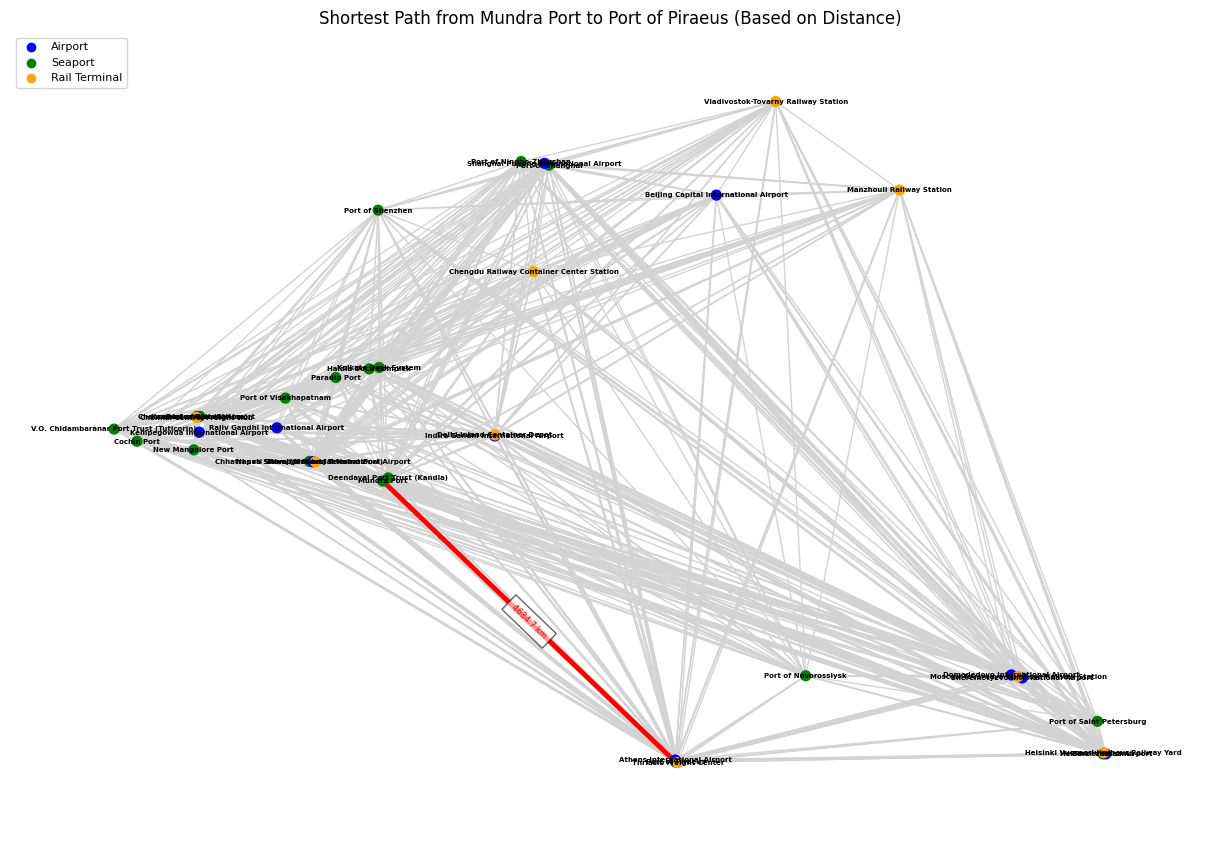

Shortest Path: Mundra Port → Port of Piraeus


In [27]:
# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
for _, row in df.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors[row["Type"]])  # Assign color based on type

# Calculate distances and add weighted edges dynamically
threshold_distance = 5000  # Max distance (in km) to connect facilities

for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            # if dist <= threshold_distance:
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1))

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Choose source and target nodes

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    print(shortest_edges)
    
    # Get edge weights for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km" for u, v in shortest_edges}

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    print("Shortest Path:", " → ".join(shortest_path))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


## using more complex dataset

In [19]:
df = pd.read_csv('logistics_facilities_updated.csv')
df.head()

,Facility Name,Code,Country,Latitude,Longitude,Type,Transit Time (hrs),Distance (km),Border Crossings,Currency
0,Mundra Port,NaN,India,22.74,69.70,Seaport,48,850,"India,China",INR
1,Nhava Sheva (Jawaharlal Nehru Port),NaN,India,18.93,72.93,Seaport,36,700,"India,Russia",INR
2,Port of Chennai,NaN,India,13.10,80.30,Seaport,50,1200,"India,Greece",INR
3,Port of Visakhapatnam,NaN,India,17.68,83.30,Seaport,55,1400,"India,Finland",INR
4,Deendayal Port Trust (Kandla),NaN,India,23.02,70.22,Seaport,42,900,"India,China",INR


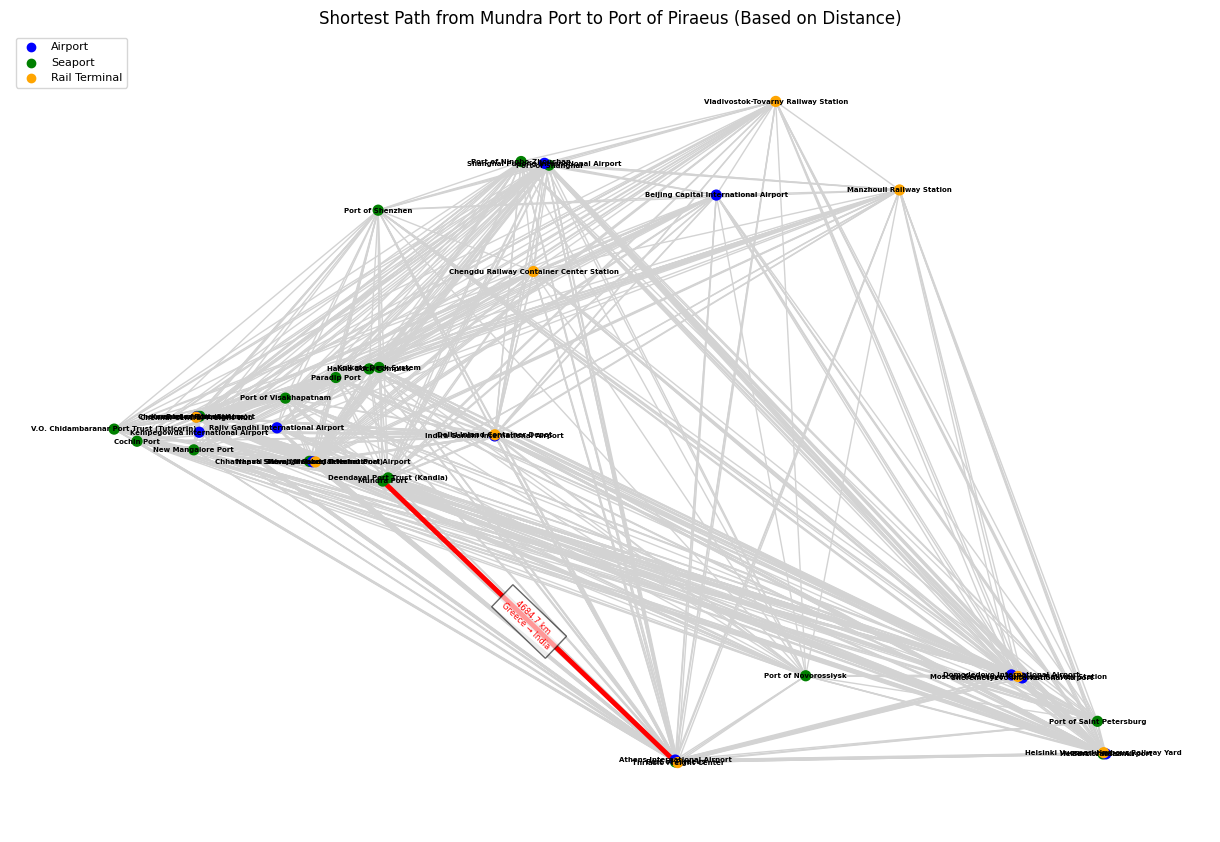

Shortest Path: Mundra Port → Port of Piraeus

Edge Details:
Mundra Port → Port of Piraeus: 4684.7 km, Border: Greece → India


In [28]:
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
for _, row in df.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors.get(row["Type"], "gray"))  # Assign color based on type

# Calculate distances and add weighted edges dynamically
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            border_crossing = f"{row1['Country']} → {row2['Country']}"
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1), border=border_crossing)

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Define source and target nodes
source = "Mundra Port"
target = "Port of Piraeus"

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    
    # Get edge weights and border crossings for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km\n{G[u][v]['border']}" for u, v in shortest_edges}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    print("Shortest Path:", " → ".join(shortest_path))
    print("\nEdge Details:")
    for u, v in shortest_edges:
        print(f"{u} → {v}: {G[u][v]['weight']} km, Border: {G[u][v]['border']}")

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


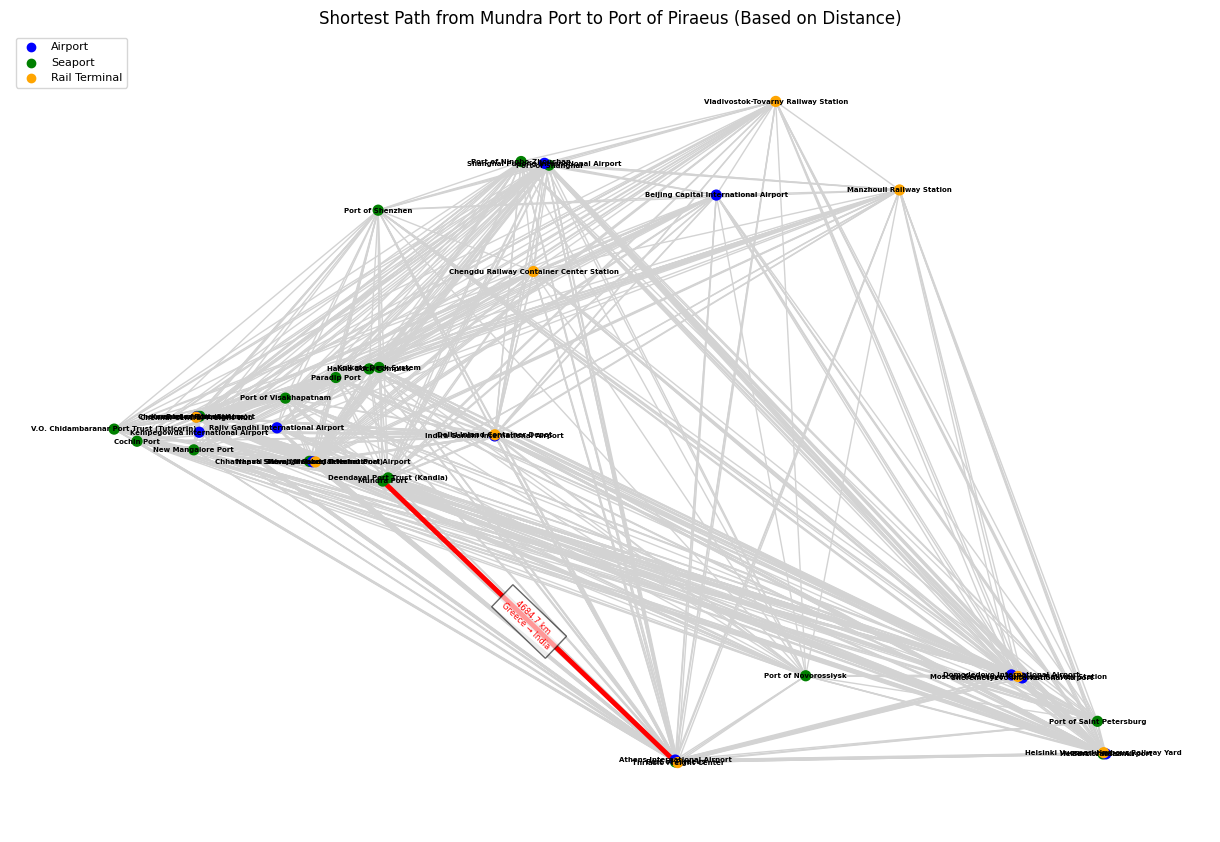

Shortest Path: Mundra Port → Port of Piraeus

Edge Details:
Mundra Port → Port of Piraeus: 4684.7 km, Border: Greece → India

Total Distance of Shortest Path: 4684.7 km
Total Border Crossings: 1
Border Crossing Countries: Greece → India


In [30]:
# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
for _, row in df.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors.get(row["Type"], "gray"))  # Assign color based on type

# Calculate distances and add weighted edges dynamically
for i, row1 in df.iterrows():
    for j, row2 in df.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            border_crossing = f"{row1['Country']} → {row2['Country']}"
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1), border=border_crossing)

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Define source and target nodes
source = "Mundra Port"
target = "Port of Piraeus"

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    
    # Get edge weights and border crossings for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km\n{G[u][v]['border']}" for u, v in shortest_edges}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    # Print important information
    print("Shortest Path:", " → ".join(shortest_path))
    print("\nEdge Details:")
    total_distance = 0
    unique_borders = set()
    for u, v in shortest_edges:
        print(f"{u} → {v}: {G[u][v]['weight']} km, Border: {G[u][v]['border']}")
        total_distance += G[u][v]['weight']
        unique_borders.add(G[u][v]['border'])
    
    print("\nTotal Distance of Shortest Path:", total_distance, "km")
    print("Total Border Crossings:", len(unique_borders))
    print("Border Crossing Countries:", ", ".join(unique_borders))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


In [36]:
len(df['Facility Name'])

39

In [38]:
df_with_city = pd.read_csv('transport_facilities_full.csv')
len(df_with_city['Country'])

39

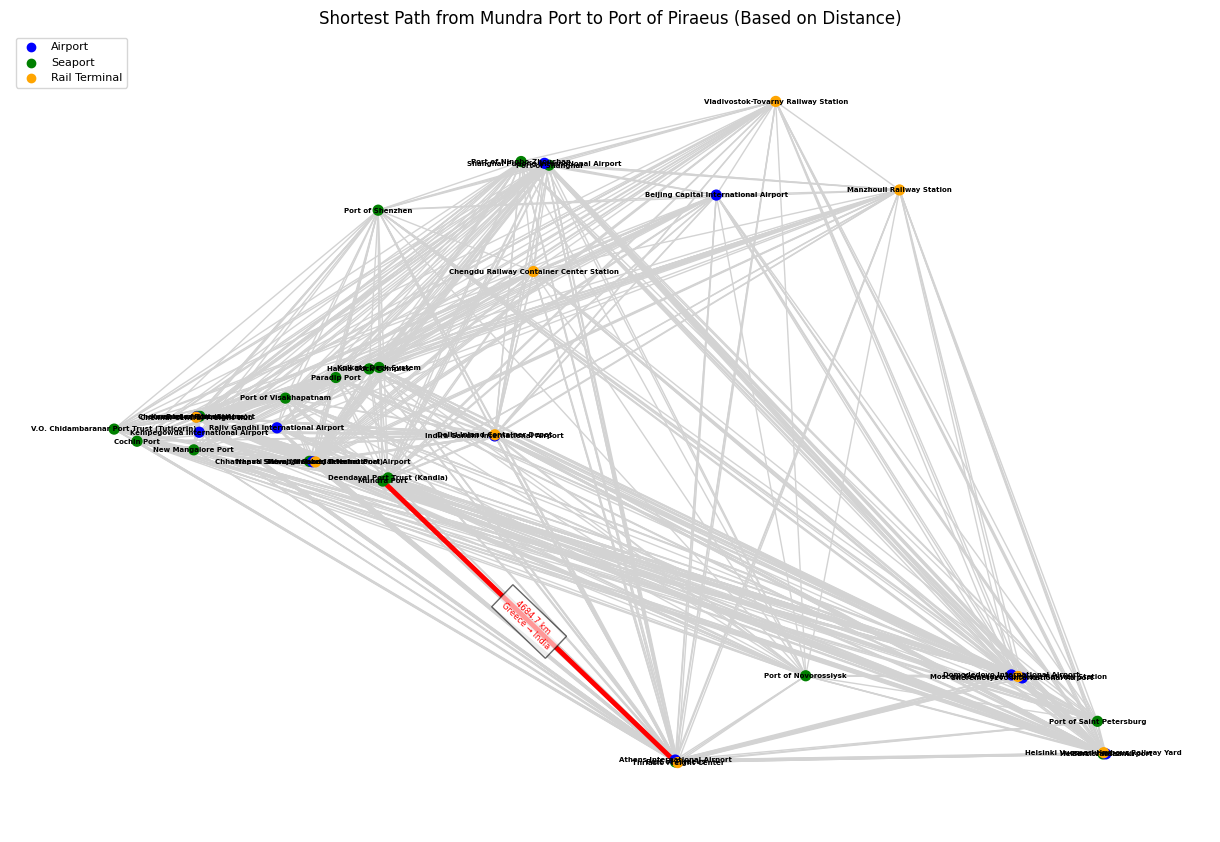

Shortest Path: Mundra Port → Port of Piraeus

Edge Details:
Mundra Port → Port of Piraeus: 4684.7 km, Border: Greece → India

Total Distance of Shortest Path: 4684.7 km
Total Border Crossings: 1
Border Crossing Countries: Greece → India


In [40]:
# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange"
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
for _, row in df_with_city.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors.get(row["Type"], "gray"))  # Assign color based on type

# Calculate distances and add weighted edges dynamically
for i, row1 in df_with_city.iterrows():
    for j, row2 in df_with_city.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            border_crossing = f"{row1['Country']} → {row2['Country']}"
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1), border=border_crossing)

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Define source and target nodes
source = "Mundra Port"
target = "Port of Piraeus"

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    
    # Get edge weights and border crossings for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km\n{G[u][v]['border']}" for u, v in shortest_edges}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    # Print important information
    print("Shortest Path:", " → ".join(shortest_path))
    print("\nEdge Details:")
    total_distance = 0
    unique_borders = set()
    for u, v in shortest_edges:
        print(f"{u} → {v}: {G[u][v]['weight']} km, Border: {G[u][v]['border']}")
        total_distance += G[u][v]['weight']
        unique_borders.add(G[u][v]['border'])
    
    print("\nTotal Distance of Shortest Path:", total_distance, "km")
    print("Total Border Crossings:", len(unique_borders))
    print("Border Crossing Countries:", ", ".join(unique_borders))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


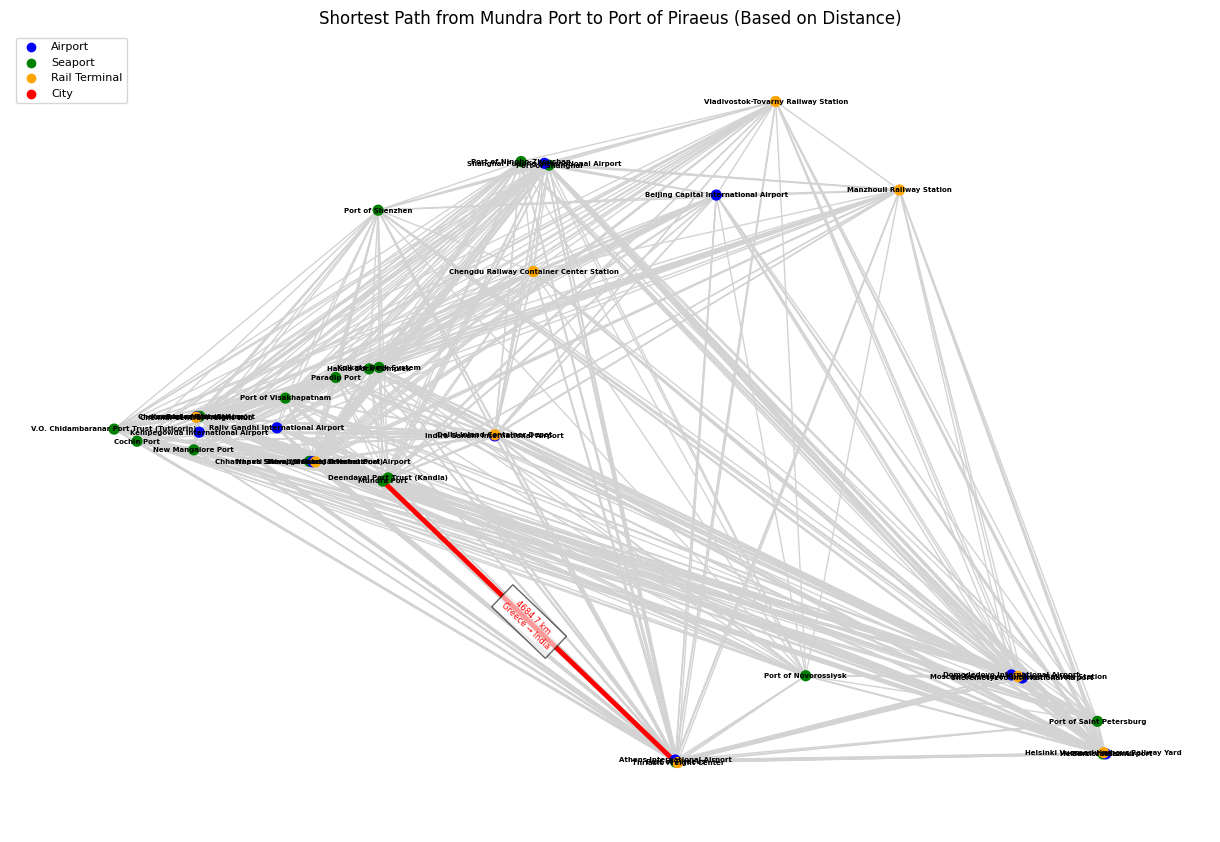

Shortest Path: Mundra Port → Port of Piraeus

Edge Details:
Mundra Port → Port of Piraeus: 4684.7 km, Border: Greece → India

Total Distance of Shortest Path: 4684.7 km
Total Border Crossings: 1
Border Crossing Countries: Greece → India


In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from geopy.distance import geodesic

# Load dataset
df_with_city = pd.read_csv("transport_facilities_full.csv")

# Define node colors based on Type
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange",
    "City": "red"  # Adding city type
}

# Create a weighted undirected graph
G = nx.Graph()

# Add nodes with positions and type
node_colors = []
node_sizes = []
for _, row in df_with_city.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    node_colors.append(type_colors.get(row["Type"], "gray"))  # Assign color based on type
    node_sizes.append(5000 if row["Type"] == "City" else 50)  # Cities have 3x size

# Calculate distances and add weighted edges dynamically
for i, row1 in df_with_city.iterrows():
    for j, row2 in df_with_city.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            border_crossing = f"{row1['Country']} → {row2['Country']}"
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1), border=border_crossing)

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Define source and target nodes
source = "Mundra Port"
target = "Port of Piraeus"

# Find the shortest path using Dijkstra's algorithm
try:
    shortest_path = nx.shortest_path(G, source=source, target=target, weight='weight')
    shortest_edges = list(zip(shortest_path, shortest_path[1:]))
    
    # Get edge weights and border crossings for the shortest path
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km\n{G[u][v]['border']}" for u, v in shortest_edges}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest path in red
    nx.draw_networkx_edges(G, pos, edgelist=shortest_edges, edge_color="red", width=3.5)

    # Draw edge labels for the shortest path
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="red", bbox=dict(facecolor="white", alpha=0.6))

    # Add legend for node colors
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal",
        "red": "City"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Shortest Path from {source} to {target} (Based on Distance)")
    plt.show()

    # Print important information
    print("Shortest Path:", " → ".join(shortest_path))
    print("\nEdge Details:")
    total_distance = 0
    unique_borders = set()
    for u, v in shortest_edges:
        print(f"{u} → {v}: {G[u][v]['weight']} km, Border: {G[u][v]['border']}")
        total_distance += G[u][v]['weight']
        unique_borders.add(G[u][v]['border'])
    
    print("\nTotal Distance of Shortest Path:", total_distance, "km")
    print("Total Border Crossings:", len(unique_borders))
    print("Border Crossing Countries:", ", ".join(unique_borders))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


In [49]:
type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange",
    "City": "red"  # Added cities as red
}

# Create a weighted undirected graph
G = nx.DiGraph()

# Add nodes with positions and type
node_colors = []
node_sizes = []
for _, row in df_with_city.iterrows():
    G.add_node(row["Facility Name"], pos=(row["Latitude"], row["Longitude"]))
    if row["Type"] == "City":
        node_colors.append("red")  # City nodes in red
        node_sizes.append(150)  # 3x size of facilities
    else:
        node_colors.append(type_colors.get(row["Type"], "gray"))
        node_sizes.append(50)  # Facility size

# Calculate distances and add weighted edges dynamically
for i, row1 in df_with_city.iterrows():
    for j, row2 in df_with_city.iterrows():
        if i != j:
            dist = geodesic((row1["Latitude"], row1["Longitude"]), (row2["Latitude"], row2["Longitude"])).km
            border_crossing = f"{row1['Country']} → {row2['Country']}"
            G.add_edge(row1["Facility Name"], row2["Facility Name"], weight=round(dist, 1), border=border_crossing)

# Get positions for nodes
pos = nx.get_node_attributes(G, "pos")

# Define source and target nodes
source = "Mundra Port"
target = "Port of Piraeus"

# Find multiple shortest paths
try:
    paths = list(nx.shortest_simple_paths(G, source=source, target=target, weight='weight'))[:3]  # Top 3 paths
    all_edges = set()
    for path in paths:
        all_edges.update(zip(path, path[1:]))
    
    # Get edge weights and border crossings
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km\n{G[u][v]['border']}" for u, v in all_edges}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, edge_color="lightgray", font_size=5, font_weight="bold")

    # Draw the shortest paths in different colors
    colors = ["red", "blue", "purple"]
    for i, path in enumerate(paths):
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[i % len(colors)], width=3.5)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="black", bbox=dict(facecolor="white", alpha=0.6))
    
    # Add legend
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal",
        "red": "City"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Optimal Routes from {source} to {target} (Multiple Paths)")
    plt.show()
    
    # Print important information
    for i, path in enumerate(paths):
        print(f"\nOptimal Route {i+1}:", " → ".join(path))
        print("Edge Details:")
        total_distance = 0
        unique_borders = set()
        for u, v in zip(path, path[1:]):
            print(f"{u} → {v}: {G[u][v]['weight']} km, Border: {G[u][v]['border']}")
            total_distance += G[u][v]['weight']
            unique_borders.add(G[u][v]['border'])
        
        print("Total Distance:", total_distance, "km")
        print("Total Border Crossings:", len(unique_borders))
        print("Border Crossing Countries:", ", ".join(unique_borders))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")


KeyboardInterrupt: 

In [52]:
df_with_city.tail()

,Facility Name,Code,Country,City,Latitude,Longitude,Type,Transit Time (hrs),Distance (km),Border Crossings,Currency
34,Helsinki-Vantaa Airport,HEL,Finland,Helsinki,60.3172,24.9633,Airport,5,300,Finland-China,EUR
35,Helsinki Vuosaari Harbour Railway Yard,NaN,Finland,Helsinki,60.2060,25.1556,Rail Terminal,18,1500,Finland-India,EUR
36,Port of Piraeus,NaN,Greece,Piraeus,37.9500,23.6300,Seaport,42,1200,Greece-Russia,EUR
37,Athens International Airport,ATH,Greece,Athens,37.9364,23.9445,Airport,6,400,Greece-China,EUR
38,Thriasio Freight Center,NaN,Greece,Athens,38.0666,23.5333,Rail Terminal,20,1600,Greece-India,EUR


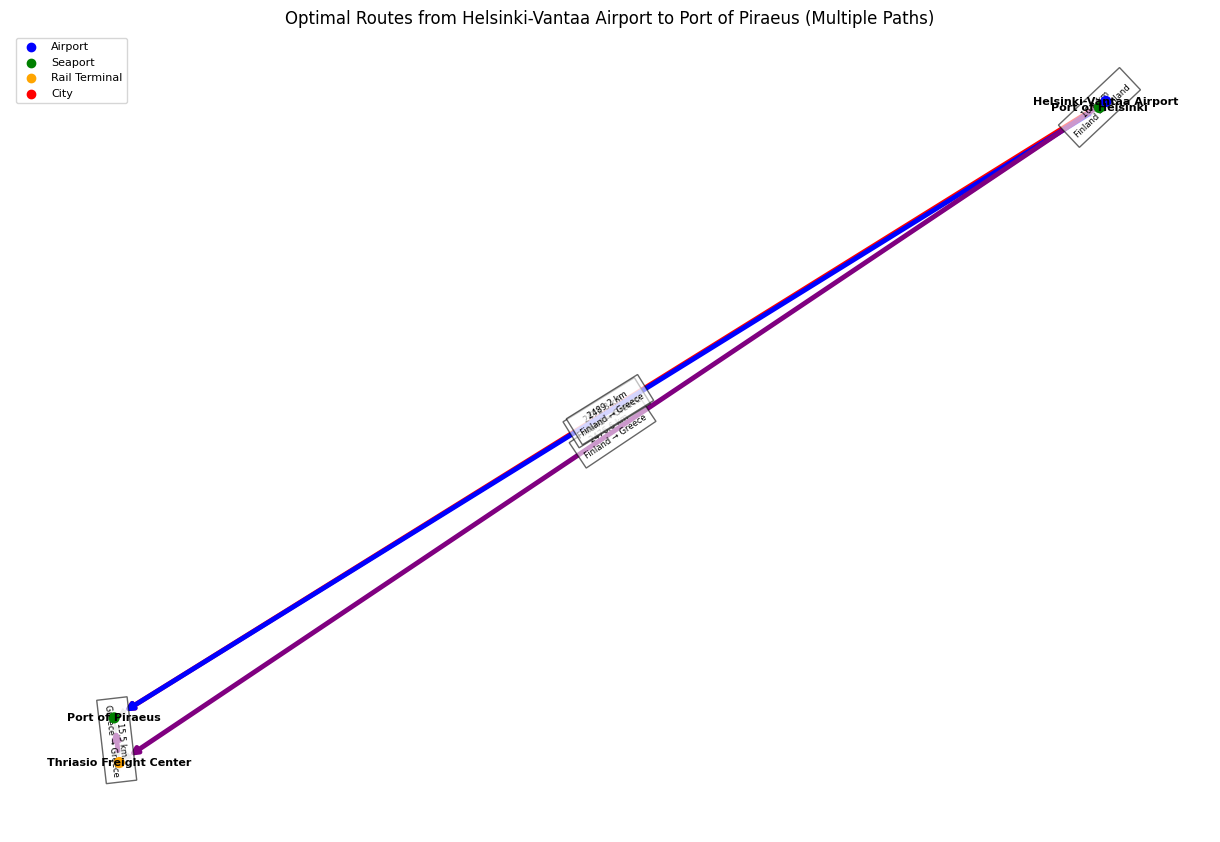


Optimal Route 1: Helsinki-Vantaa Airport → Port of Piraeus
Edge Details:
Helsinki-Vantaa Airport → Port of Piraeus: 2489.2 km, Border: Finland → Greece
Total Distance: 2489.2 km
Total Border Crossings: 1
Border Crossing Countries: Finland → Greece

Optimal Route 2: Helsinki-Vantaa Airport → Port of Helsinki → Port of Piraeus
Edge Details:
Helsinki-Vantaa Airport → Port of Helsinki: 16.4 km, Border: Finland → Finland
Port of Helsinki → Port of Piraeus: 2472.8 km, Border: Finland → Greece
Total Distance: 2489.2000000000003 km
Total Border Crossings: 2
Border Crossing Countries: Finland → Finland, Finland → Greece

Optimal Route 3: Helsinki-Vantaa Airport → Thriasio Freight Center → Port of Piraeus
Edge Details:
Helsinki-Vantaa Airport → Thriasio Freight Center: 2476.6 km, Border: Finland → Greece
Thriasio Freight Center → Port of Piraeus: 15.5 km, Border: Greece → Greece
Total Distance: 2492.1 km
Total Border Crossings: 2
Border Crossing Countries: Greece → Greece, Finland → Greece


In [53]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import pandas as pd

type_colors = {
    "Airport": "blue",
    "Seaport": "green",
    "Rail Terminal": "orange",
    "City": "red"
}

# Create a weighted directed graph
G = nx.DiGraph()

# Add nodes with positions and type
node_colors = []
node_sizes = []
for _, row in df_with_city.iterrows():
    G.add_node(row["Facility Name"], 
               pos=(row["Latitude"], row["Longitude"]),
               type=row["Type"],
               country=row["Country"])
    if row["Type"] == "City":
        node_colors.append("red")
        node_sizes.append(150)
    else:
        node_colors.append(type_colors.get(row["Type"], "gray"))
        node_sizes.append(50)

# Instead of connecting every node to every other node, use a more selective approach
# Option 1: Connect only to k-nearest neighbors
k = 10  # Connect each node to its 10 nearest neighbors

# First, build a spatial index
node_locations = {node: data["pos"] for node, data in G.nodes(data=True)}
nodes_list = list(G.nodes())

# For each node, find k nearest neighbors
for i, node1 in enumerate(nodes_list):
    pos1 = node_locations[node1]
    country1 = G.nodes[node1]["country"]
    
    # Calculate distances to all other nodes
    distances = []
    for node2 in nodes_list:
        if node1 != node2:
            pos2 = node_locations[node2]
            dist = geodesic(pos1, pos2).km
            distances.append((node2, dist))
    
    # Sort by distance and take k nearest
    distances.sort(key=lambda x: x[1])
    for node2, dist in distances[:k]:
        country2 = G.nodes[node2]["country"]
        border_crossing = f"{country1} → {country2}"
        G.add_edge(node1, node2, weight=round(dist, 1), border=border_crossing)

# Define source and target nodes
source = "Helsinki-Vantaa Airport"
target = "Port of Piraeus"

# Find multiple shortest paths
try:
    # Get positions for plotting
    pos = {node: data["pos"] for node, data in G.nodes(data=True)}
    
    # Use Dijkstra to find shortest paths
    # This is much faster than shortest_simple_paths for large graphs
    length, path = nx.single_source_dijkstra(G, source=source, target=target, weight='weight')
    
    # Optionally find alternative paths by temporarily removing edges from the shortest path
    paths = [path]
    temp_G = G.copy()
    
    # Find 2 more alternative paths by removing critical edges
    for i in range(2):
        # Remove a critical edge from the previous path
        if len(paths[-1]) >= 2:
            critical_edges = []
            for j in range(len(paths[-1])-1):
                u, v = paths[-1][j], paths[-1][j+1]
                if temp_G.has_edge(u, v):
                    critical_edges.append((u, v, temp_G[u][v]['weight']))
                    temp_G.remove_edge(u, v)
            
            # Try to find an alternative path
            try:
                alt_length, alt_path = nx.single_source_dijkstra(temp_G, source=source, target=target, weight='weight')
                paths.append(alt_path)
            except (nx.NetworkXNoPath, nx.NodeNotFound):
                # Restore the edges we removed if no path is found
                for u, v, w in critical_edges:
                    temp_G.add_edge(u, v, weight=w, border=G[u][v]['border'])
    
    # Collect all edges from all paths
    all_edges = set()
    for path in paths:
        path_edges = list(zip(path, path[1:]))
        all_edges.update(path_edges)
    
    # Get edge weights and border crossings
    shortest_edge_labels = {(u, v): f"{G[u][v]['weight']} km\n{G[u][v]['border']}" for u, v in all_edges if G.has_edge(u, v)}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    
    # Draw only nodes that are in the paths or within 1 hop of the paths
    nodes_in_paths = set()
    for path in paths:
        nodes_in_paths.update(path)
    
    # Get the subgraph containing only relevant nodes
    relevant_nodes = list(nodes_in_paths)
    subgraph = G.subgraph(relevant_nodes)
    
    # Filter node colors and sizes for the subgraph
    sub_node_colors = [node_colors[nodes_list.index(node)] for node in subgraph.nodes()]
    sub_node_sizes = [node_sizes[nodes_list.index(node)] for node in subgraph.nodes()]
    
    # Draw the subgraph
    nx.draw(subgraph, {n: pos[n] for n in subgraph.nodes()}, 
            with_labels=True, node_size=sub_node_sizes, node_color=sub_node_colors, 
            edge_color="lightgray", font_size=8, font_weight="bold")

    # Draw the paths in different colors
    colors = ["red", "blue", "purple"]
    for i, path in enumerate(paths):
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[i % len(colors)], width=3.5)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="black", bbox=dict(facecolor="white", alpha=0.6))
    
    # Add legend
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal",
        "red": "City"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Optimal Routes from {source} to {target} (Multiple Paths)")
    plt.show()
    
    # Print important information
    for i, path in enumerate(paths):
        print(f"\nOptimal Route {i+1}:", " → ".join(path))
        print("Edge Details:")
        total_distance = 0
        unique_borders = set()
        for u, v in zip(path, path[1:]):
            if G.has_edge(u, v):  # Make sure the edge exists
                print(f"{u} → {v}: {G[u][v]['weight']} km, Border: {G[u][v]['border']}")
                total_distance += G[u][v]['weight']
                unique_borders.add(G[u][v]['border'])
        
        print("Total Distance:", total_distance, "km")
        print("Total Border Crossings:", len(unique_borders))
        print("Border Crossing Countries:", ", ".join(unique_borders))

except nx.NetworkXNoPath:
    print(f"No path found between {source} and {target}.")
except nx.NodeNotFound as e:
    print(f"Node not found error: {e}")

Now the crucial problem that remains is that these routes are direct and not following predetermined or realistic rotues i.e. the road / shipping lanes / ship routes / airways etc.

In [54]:
df_with_city.head(0)

,Facility Name,Code,Country,City,Latitude,Longitude,Type,Transit Time (hrs),Distance (km),Border Crossings,Currency


No path found between Mundra Port and Port of Piraeus.


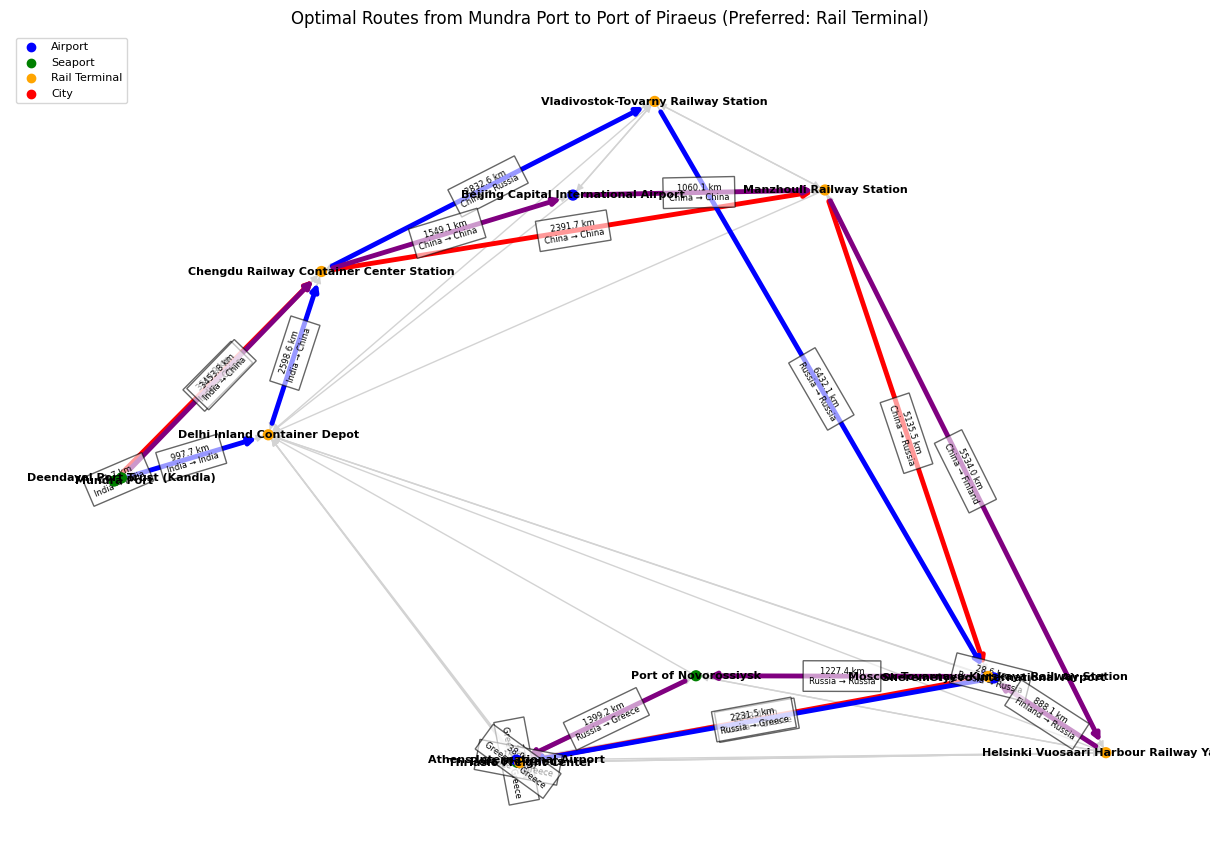


Optimal Route 1: Mundra Port → Chengdu Railway Container Center Station → Manzhouli Railway Station → Moscow-Tovarnaya-Kurskaya Railway Station → Thriasio Freight Center → Port of Piraeus
Edge Details:
Mundra Port → Chengdu Railway Container Center Station (Rail Terminal): 3514.9 km, Border: India → China
Chengdu Railway Container Center Station → Manzhouli Railway Station (Rail Terminal): 2391.7 km, Border: China → China
Manzhouli Railway Station → Moscow-Tovarnaya-Kurskaya Railway Station (Rail Terminal): 5135.5 km, Border: China → Russia
Moscow-Tovarnaya-Kurskaya Railway Station → Thriasio Freight Center (Rail Terminal): 2231.5 km, Border: Russia → Greece
Thriasio Freight Center → Port of Piraeus (Seaport): 15.5 km, Border: Greece → Greece
Total Distance: 13289.1 km
Total Border Crossings: 5
Border Crossing Countries: Greece → Greece, China → Russia, China → China, Russia → Greece, India → China
Transportation Mode Usage:
  - Seaport: 1 facilities
  - Rail Terminal: 4 facilities

O

In [ ]:
import networkx as nx
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import pandas as pd

def find_optimal_routes(df_with_city, source, target, preferred_mode=None, k=10):
    """
    Find optimal routes between source and target with mode preference option.
    
    Parameters:
    - df_with_city: DataFrame with facility information
    - source: Source location name
    - target: Target location name
    - preferred_mode: Preferred transportation mode ('Airport', 'Seaport', 'Rail Terminal', or None)
    - k: Number of nearest neighbors to connect
    
    Returns:
    - G: NetworkX graph
    - paths: List of paths found
    - pos: Node positions for drawing
    - node_colors: Colors for each node
    - node_sizes: Sizes for each node
    """
    type_colors = {
        "Airport": "blue",
        "Seaport": "green",
        "Rail Terminal": "orange",
        "City": "red"
    }
    
    # Create a weighted directed graph
    G = nx.DiGraph()
    
    # Add nodes with positions and type
    node_colors = []
    node_sizes = []
    nodes_list = []
    
    for _, row in df_with_city.iterrows():
        G.add_node(row["Facility Name"], 
                  pos=(row["Latitude"], row["Longitude"]),
                  type=row["Type"],
                  country=row["Country"])
        
        if row["Type"] == "City":
            node_colors.append("red")
            node_sizes.append(150)
        else:
            node_colors.append(type_colors.get(row["Type"], "gray"))
            node_sizes.append(50)
        
        nodes_list.append(row["Facility Name"])
    
    # Build a spatial index
    node_locations = {node: data["pos"] for node, data in G.nodes(data=True)}
    
    # Mode preference weight factors
    mode_weight_factors = {
        None: {"Airport": 1.0, "Seaport": 1.0, "Rail Terminal": 1.0, "City": 1.0},
        "Airport": {"Airport": 0.5, "Seaport": 1.5, "Rail Terminal": 1.3, "City": 1.2},
        "Seaport": {"Airport": 1.5, "Seaport": 0.5, "Rail Terminal": 1.3, "City": 1.2},
        "Rail Terminal": {"Airport": 1.5, "Seaport": 1.3, "Rail Terminal": 0.5, "City": 1.2},
    }
    
    # Get the weight factors based on user preference
    weight_factors = mode_weight_factors.get(preferred_mode, mode_weight_factors[None])
    
    # For each node, find k nearest neighbors
    for i, node1 in enumerate(nodes_list):
        pos1 = node_locations[node1]
        country1 = G.nodes[node1]["country"]
        type1 = G.nodes[node1]["type"]
        
        # Calculate distances to all other nodes
        distances = []
        for node2 in nodes_list:
            if node1 != node2:
                pos2 = node_locations[node2]
                type2 = G.nodes[node2]["type"]
                
                # Base distance
                dist = geodesic(pos1, pos2).km
                
                # Apply mode preference - adjust weight based on node types
                # If the destination node is of preferred type, reduce the weight
                # If the origin node is of preferred type, also slightly reduce the weight
                weight_factor = weight_factors.get(type2, 1.0)
                
                # Store the original distance and adjusted weight
                adjusted_dist = dist * weight_factor
                distances.append((node2, adjusted_dist, dist))
        
        # Sort by adjusted distance and take k nearest
        distances.sort(key=lambda x: x[1])
        for node2, adjusted_dist, orig_dist in distances[:k]:
            country2 = G.nodes[node2]["country"]
            border_crossing = f"{country1} → {country2}"
            
            # Store both the adjusted weight (for pathfinding) and original distance (for display)
            G.add_edge(node1, node2, 
                      weight=round(adjusted_dist, 1), 
                      actual_distance=round(orig_dist, 1),
                      border=border_crossing)
    
    # Find multiple shortest paths
    try:
        # Get positions for plotting
        pos = {node: data["pos"] for node, data in G.nodes(data=True)}
        
        # Use Dijkstra to find shortest paths
        length, path = nx.single_source_dijkstra(G, source=source, target=target, weight='weight')
        
        # Optionally find alternative paths by temporarily removing edges from the shortest path
        paths = [path]
        temp_G = G.copy()
        
        # Find 2 more alternative paths by removing critical edges
        for i in range(2):
            # Remove a critical edge from the previous path
            if len(paths[-1]) >= 2:
                critical_edges = []
                for j in range(len(paths[-1])-1):
                    u, v = paths[-1][j], paths[-1][j+1]
                    if temp_G.has_edge(u, v):
                        critical_edges.append((u, v, temp_G[u][v]['weight'], 
                                              temp_G[u][v]['actual_distance'], 
                                              temp_G[u][v]['border']))
                        temp_G.remove_edge(u, v)
                
                # Try to find an alternative path
                try:
                    alt_length, alt_path = nx.single_source_dijkstra(temp_G, source=source, target=target, weight='weight')
                    paths.append(alt_path)
                except (nx.NetworkXNoPath, nx.NodeNotFound):
                    # Restore the edges we removed if no path is found
                    for u, v, w, d, b in critical_edges:
                        temp_G.add_edge(u, v, weight=w, actual_distance=d, border=b)
        
        return G, paths, pos, node_colors, node_sizes, nodes_list
    
    except nx.NetworkXNoPath:
        print(f"No path found between {source} and {target}.")
        return None, [], {}, [], [], []
    except nx.NodeNotFound as e:
        print(f"Node not found error: {e}")
        return None, [], {}, [], [], []

def visualize_routes(G, paths, pos, node_colors, node_sizes, nodes_list, source, target, preferred_mode=None):
    """
    Visualize the optimal routes
    """
    if not paths:
        return
    
    # Collect all edges from all paths
    all_edges = set()
    for path in paths:
        path_edges = list(zip(path, path[1:]))
        all_edges.update(path_edges)
    
    # Get edge weights and border crossings
    shortest_edge_labels = {(u, v): f"{G[u][v]['actual_distance']} km\n{G[u][v]['border']}" 
                          for u, v in all_edges if G.has_edge(u, v)}
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    
    # Draw only nodes that are in the paths or within 1 hop of the paths
    nodes_in_paths = set()
    for path in paths:
        nodes_in_paths.update(path)
    
    # Get the subgraph containing only relevant nodes
    relevant_nodes = list(nodes_in_paths)
    subgraph = G.subgraph(relevant_nodes)
    
    # Filter node colors and sizes for the subgraph
    sub_node_colors = [node_colors[nodes_list.index(node)] for node in subgraph.nodes()]
    sub_node_sizes = [node_sizes[nodes_list.index(node)] for node in subgraph.nodes()]
    
    # Draw the subgraph
    nx.draw(subgraph, {n: pos[n] for n in subgraph.nodes()}, 
            with_labels=True, node_size=sub_node_sizes, node_color=sub_node_colors, 
            edge_color="lightgray", font_size=8, font_weight="bold")

    # Draw the paths in different colors
    colors = ["red", "blue", "purple"]
    for i, path in enumerate(paths):
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors[i % len(colors)], width=3.5)
    
    # Draw edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=shortest_edge_labels, font_size=6, font_color="black", bbox=dict(facecolor="white", alpha=0.6))
    
    # Add legend
    legend_labels = {
        "blue": "Airport",
        "green": "Seaport",
        "orange": "Rail Terminal",
        "red": "City"
    }
    for color, label in legend_labels.items():
        plt.scatter([], [], color=color, label=label)
    
    # Add extra information to title if there's a mode preference
    title_suffix = f" (Preferred: {preferred_mode})" if preferred_mode else " (Multiple Paths)"
    plt.legend(loc="upper left", fontsize=8)
    plt.title(f"Optimal Routes from {source} to {target}{title_suffix}")
    plt.show()
    
    # Print important information
    for i, path in enumerate(paths):
        print(f"\nOptimal Route {i+1}:", " → ".join(path))
        print("Edge Details:")
        total_distance = 0
        unique_borders = set()
        node_types_count = {"Airport": 0, "Seaport": 0, "Rail Terminal": 0, "City": 0}
        
        for u, v in zip(path, path[1:]):
            if G.has_edge(u, v):  # Make sure the edge exists
                v_type = G.nodes[v]["type"]
                node_types_count[v_type] = node_types_count.get(v_type, 0) + 1
                
                print(f"{u} → {v} ({G.nodes[v]['type']}): {G[u][v]['actual_distance']} km, Border: {G[u][v]['border']}")
                total_distance += G[u][v]['actual_distance']
                unique_borders.add(G[u][v]['border'])
        
        print("Total Distance:", round(total_distance, 1), "km")
        print("Total Border Crossings:", len(unique_borders))
        print("Border Crossing Countries:", ", ".join(unique_borders))
        print("Transportation Mode Usage:")
        for mode, count in node_types_count.items():
            if count > 0:
                print(f"  - {mode}: {count} facilities")

# Example usage:
def main(preferred_mode=None):
    # Define source and target nodes
    source = "Mundra Port"
    target = "Port of Piraeus"
    
    # Find optimal routes with mode preference
    G, paths, pos, node_colors, node_sizes, nodes_list = find_optimal_routes(
        df_with_city, source, target, preferred_mode=preferred_mode, k=10
    )
    
    if G:
        # Visualize the routes
        visualize_routes(G, paths, pos, node_colors, node_sizes, nodes_list, source, target, preferred_mode)

# Run with different mode preferences
main()  # No preference
# main("Airport")  # Prefer air routes
# main("Seaport")  # Prefer sea routes
# main("Rail Terminal")  # Prefer rail routes